# Airline Passenger Statisfaction Prediction

Motivation: 
For an airline, to generate more revenue, the most important thing is to attract as many passenger as they can. With a good reputation on its service can definitely expand the passenger base and consequently increase sales and gain profits. Therefore, the airline need to be aware of which area of service can significantly affect the passenger's satisfaction. Also, with the prediction, the airline can also implement the model to predict whether a passenger is satisfied with the airline and conduct precision marketing campaign. After all, satisfaction equals to reputation, and reputation can transform into profit.

1. Data Source: The Airline Passenger Satisfaction dataset on Kaggle https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?resource=download

2. Goal: To discover areas that the airline should improve or emphasize on and also to be able to make predictions on individual passenger's satisfaction.

3. Methods: Using supervised learning classification model (For example: ***Logistic Regression, RandomForestClassifier and XGB Classifier ***) to find the model that reflects the key area of services and best predict the passengers' satisfaction.

The workflow:

1. Exploratory Data Analysis & Data Processing

2. Training & Tuning each supervised learning model

3. Comparing and selecting the best model

4. Analyzing feature importance(eg. Key areas)

5. Summary & Recommendations


In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Explanatory Data Analysis & Data Processing

## Loading the data 

For this project, I am using the **Airline Passenger Satisfaction** dataset from Kaggle.

This dataset comprise of passengers' satisfaction score from an airline. Including passengers' personal detail, flights, and their satsifaction score on different aspects of services.

In this dataset, we have **129,880** observations and **24** features(including **1 target variable**)

The overview of data:

Passenger Features:
- ID: Unique passenger identifier
- Gender: Gender of the passenger (Female/Male)
- Age: Age of the passenger
- Customer Type: Type of airline customer (First-time/Returning)
- Type of Travel: Purpose of the flight (Business/Personal)
- Class: Travel class in the airplane for the passenger seat
- Flight Distance: Flight distance in miles

Service-realted Features:
- Departure Delay: Flight departure delay in minutes
- Arrival Delay: Flight arrival delay in minutes
- Departure and Arrival Time Convenience: Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Ease of Online Booking: Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Check-in Service: Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Online Boarding: Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Gate Location: Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- On-board Service: Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Seat Comfort: Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Leg Room Service: Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Cleanliness: Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Food and Drink: Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- In-flight Service: Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- In-flight Wifi Service: Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- In-flight Entertainment: Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- Baggage Handling: Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means "not applicable"

Target Variable:
- Satisfaction: Overall satisfaction level with the airline (Satisfied/Neutral or Dissatisfied)


In [2]:
# Loading the dataset
satisfaction = pd.read_csv("airline_passenger_satisfaction.csv")
satisfaction.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Explanatory Data Analysis

In [3]:
# Structure and Characteristic about the dataset
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

#### Missing Value
According to the structure & characteristics show above, we can see that there is only one feature has missing value.
**Arrival Delay** has 129,487 values, which means there are 393 values missing. But comparing to 129,880, it is relatively a small amount. Therefore I will just delete those lines with missing value in the data processing later.

#### Feature Distribution: Categorical Features

In [4]:
# Distribution for categorical features: Gender
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
for category in categorical:
    print(satisfaction[category].value_counts())
    print("")


Gender
Female    65899
Male      63981
Name: count, dtype: int64

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64



According to the output above, 

- **Gender** : The passengers' gender is pretty even, with **Male only slightly more than Female**.

- **Customer Type** : Most of the passengers are **Returning** customer, suggesting that there will be a lot of Returing customer and they will definitely notice our services' changes or improvement.

- **Type of Travel** : Majority of the passengers took the flight for **Business** purpose. 

- **Class** : Passengers taking **Business Class** and **Economy Class** are rather even. Only a small amout of passengers took **Economy Plus Class**

- **Satisfaction** : This target variable mostly are **Neutral or Dissatisfied**, we want to analyze what are the important features that affects passengers's attitude towards the airline and emphasize or improve on them. 

As an airline, the already existing service difference mainly lies in **Class**, so I will conduct analysis with these 3 classes respectively and try to find out what are the areas that the passengers' emphasize on the most in each class.

#### Distribution: Numeric Features

In [5]:
# Descriptive Statistics of the dataset
satisfaction.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Departure Delay'}>],
       [<Axes: title={'center': 'Arrival Delay'}>,
        <Axes: title={'center': 'Departure and Arrival Time Convenience'}>,
        <Axes: title={'center': 'Ease of Online Booking'}>,
        <Axes: title={'center': 'Check-in Service'}>],
       [<Axes: title={'center': 'Online Boarding'}>,
        <Axes: title={'center': 'Gate Location'}>,
        <Axes: title={'center': 'On-board Service'}>,
        <Axes: title={'center': 'Seat Comfort'}>],
       [<Axes: title={'center': 'Leg Room Service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Food and Drink'}>,
        <Axes: title={'center': 'In-flight Service'}>],
       [<Axes: title={'center': 'In-flight Wifi Service'}>,
        <Axes: title={'center': 'In-flight Entertainment'}>,
        <Axes: title={'center': 'Bagg

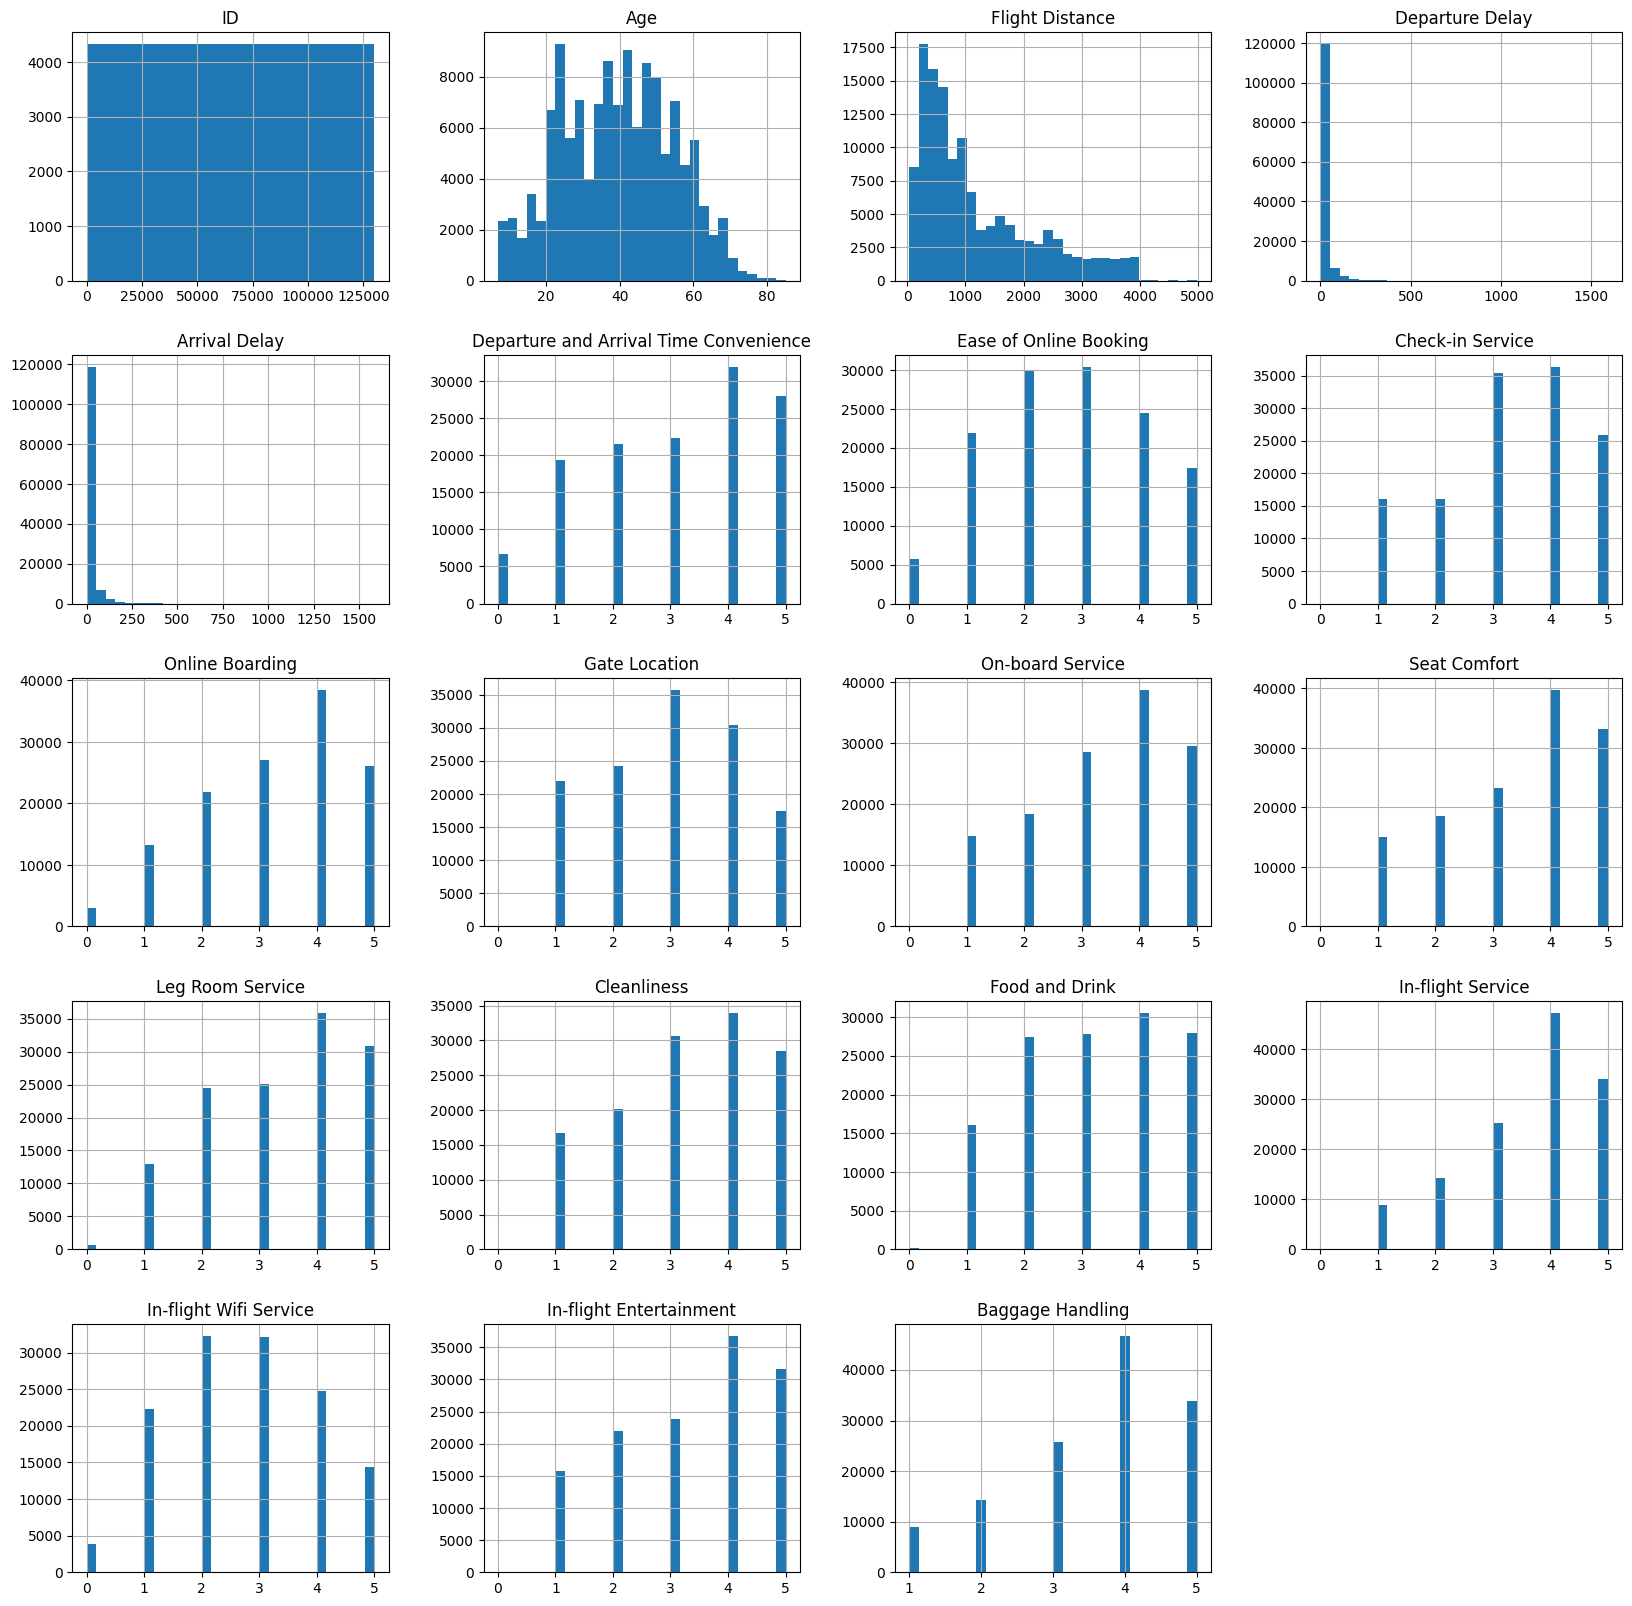

In [6]:
# Distribution for numerical features
satisfaction.hist(figsize=(20, 20), bins=30)

According to the graph above,

- **ID**: The ID does not help, so I will take it off in this analysis.

- **Age**: Roughly normally distributed.

- **Flight Distance**: Corresponding to basic knowledge that most of the flights are relatively short distance with only little amount of long distance flights. 

- **Departure Delay** & **Arrival Delay**: Consistent with the fact that most of the delay would not last long. But we can see that these 2 histogram are basically the same as a delay in departure will most certainly cause a delay in arrival. We should keep an eye out for these 2 feature during the processing stage.

- **Service-related features: From Departure and Arrival Time Convenience to Baggage Handling**: Most of the satisfaction lies in score 3 and 4, which is a decent satisfaction score. We would not do further transformation on these features.

#### Basic Data Transformation & Correlation Calculation

In [7]:
# Transforming the Binary Catregorical Variables to dummy encoding. 
category_to_transform = ['Gender', 'Customer Type', 'Type of Travel', 'Satisfaction']
levels = [['Female', 'Male'], ['Returning', 'First-time'], ['Business', 'Personal'], ['Neutral or Dissatisfied', 'Satisfied']]
for i in range(4):
    satisfaction[category_to_transform[i]].replace({levels[i][1]:1, levels[i][0]:0}, inplace=True)


C:\Users\ryant\AppData\Local\Temp\ipykernel_27392\947032149.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  satisfaction[category_to_transform[i]].replace({levels[i][1]:1, levels[i][0]:0}, inplace=True)
C:\Users\ryant\AppData\Local\Temp\ipykernel_27392\947032149.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [8]:
satisfaction.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,1,0,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,0,0,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,0,0,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,0,0,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,0,0,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


<Axes: >

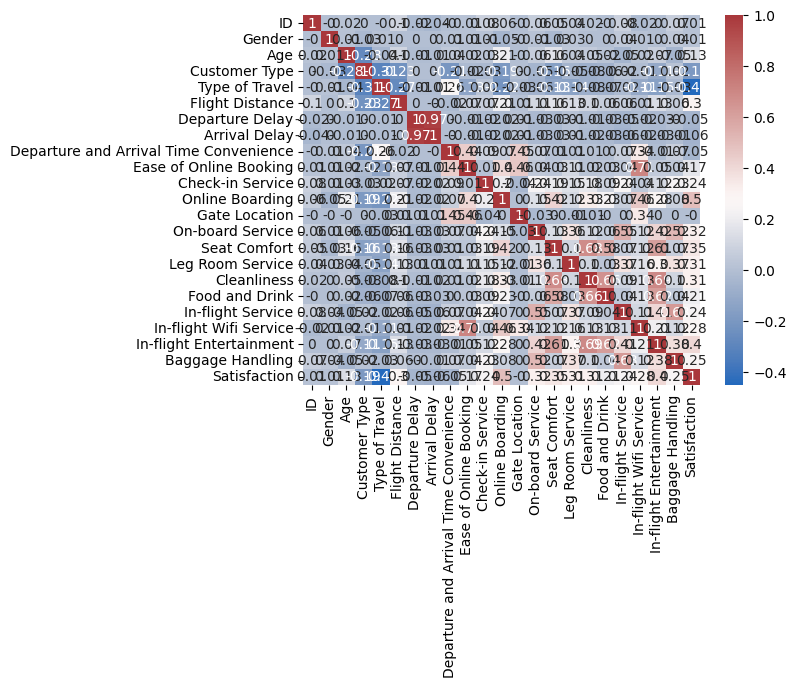

In [9]:
# Correlation
numeric_data = satisfaction.select_dtypes(include=['number'])

# compute correlations
correlations = numeric_data.corr().round(2)  # note the beauty of pandas. We just 'ask' our data frame to give us 
                                             # the correlations among features; very easy-to-read code     
# plot correlation heatmap
sns.heatmap(correlations, cmap='vlag', annot=True)

Before jumping into correlation between features and targets. 

I have an assumption that all of the service-related satisfaction has a **positive** relationships with the passenger's satisfaction status.



In [10]:
print(correlations['Satisfaction'].iloc[:-1])

ID                                        0.01
Gender                                    0.01
Age                                       0.13
Customer Type                            -0.19
Type of Travel                           -0.45
Flight Distance                           0.30
Departure Delay                          -0.05
Arrival Delay                            -0.06
Departure and Arrival Time Convenience   -0.05
Ease of Online Booking                    0.17
Check-in Service                          0.24
Online Boarding                           0.50
Gate Location                            -0.00
On-board Service                          0.32
Seat Comfort                              0.35
Leg Room Service                          0.31
Cleanliness                               0.31
Food and Drink                            0.21
In-flight Service                         0.24
In-flight Wifi Service                    0.28
In-flight Entertainment                   0.40
Baggage Handl

The correlation result indicates that almost all of the service-related satisfaction score is positively correlated with the passenger's satisfaction status(The target variable), which is consistent with my assumption. 

However, the **Departure Delay**, **Arrival Delay** and **Departure and Arrival Time Convenience** has a small negative relationship with the target variable. But we need to keep in mind that between **Departure Delay** and **Arrival Delay** has a high correlation(**0.97**), there might me a multicollinearity problem required further processing.

According to the correlation matrix and the correlation to target variable result above,

1. I will delete **ID, Gender and Gate Location** column since its corrleation with the target variable is basically non-existence.

2. Due to the nature and high correlation between **Departure Delay** and **Arrival Delay**, I will transform the column into **Delay**, which indicates whether the passenger encountered a delay during this flight, would be more suitable.

## Data Processing

Based on the Explanatory Data Analysis, 

I will delete column **ID, Gender and Gate Location** and combine **Departure Delay** and **Arrival Delay** into a single column **Delay**. 

After that, I will divide the dataset into 3 subsets corresponding to 3 different classes. 

At last, by using **Scaler**, I will prepare the dataset for further model use. 

In [11]:
## Deleting the missing value in Arrival Delay
satisfaction_filter_1 = satisfaction.dropna(subset=['Arrival Delay'])

In [12]:
## Deleting the ID, Gender and Gate Location
columns_to_drop = ['ID', 'Gender', 'Gate Location']
satisfaction_filter_2 = satisfaction_filter_1.drop(columns = columns_to_drop)

In [13]:
## Combining the Departure Delay & Arrival Delay into "Delay" column
# First by aggregating two columns
satisfaction_filter_2['Delay'] = satisfaction_filter_2['Arrival Delay'] + satisfaction_filter_2['Departure Delay']
# If the data is larger than 0, we will assign it to Delay(1). On the other hand, we will assign it to No Delay(0)
satisfaction_filter_2['Delay'] = satisfaction_filter_2['Delay'].apply(lambda x: 1 if x > 0 else 0)
# Drop the Arrival Delay and Departure Delay column
delay_drop = ['Arrival Delay', 'Departure Delay']
satisfaction_filter_3 = satisfaction_filter_2.drop(columns = delay_drop)

In [14]:
## Separate the dataset into 3 based on their class(Business, Economy, Economy Plus)
business_sat = satisfaction_filter_3[satisfaction_filter_3["Class"] == "Business"].drop(columns="Class")
economy_sat = satisfaction_filter_3[satisfaction_filter_3["Class"] == "Economy"].drop(columns="Class")
economy_plus_sat = satisfaction_filter_3[satisfaction_filter_3["Class"] == "Economy Plus"].drop(columns="Class")

In [15]:
## Separating the features and target variables
# Separating features
X_business = business_sat.drop(columns = "Satisfaction")
X_economy = economy_sat.drop(columns = "Satisfaction")
X_economy_plus = economy_plus_sat.drop(columns = "Satisfaction")

# Separating target variables
y_business = business_sat['Satisfaction']
y_economy = economy_sat['Satisfaction']
y_economy_plus = economy_plus_sat['Satisfaction']

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_business = pd.DataFrame(scaler.fit_transform(X_business), columns = X_business.columns)
X_economy = pd.DataFrame(scaler.fit_transform(X_economy), columns = X_economy.columns)
X_economy_plus = pd.DataFrame(scaler.fit_transform(X_economy_plus), columns = X_economy_plus.columns)

# 2. Training & Tuning Supervised Learning Models

For this part, I will start by using **Logistic Regression** to see the overall relationship between features and satisfaction in each classes.

After that, for each class, I will train and tune **Logistic Regression, GradientBoostingClassifier, RandomForestClassifierr and Neural Network** and evaluate which model performs the best.

## Feature-Target Relationship: Logistic Regression


In [17]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

# Aligning the index
y_business.index = range(0, len(X_business))
y_economy.index = range(0, len(X_economy))
y_economy_plus.index = range(0, len(X_economy_plus))

# Fitting the logistic regression model for each of the classes
business_log_all = sm.Logit(y_business, sm.add_constant(X_business))
economy_log_all = sm.Logit(y_economy, sm.add_constant(X_economy))
economy_plus_log_all = sm.Logit(y_economy_plus, sm.add_constant(X_economy_plus))

business_log_result = business_log_all.fit()
economy_log_result = economy_log_all.fit()
economy_plus_log_result = economy_plus_log_all.fit()


# Combine results into one table
summary_table = summary_col(
    results=[business_log_result, economy_log_result, economy_plus_log_result],
    model_names=['Business', 'Economy', 'Economy Plus'],
    stars=True,  # Adds significance stars
    info_dict={
        'AIC': lambda x: f"{x.aic:.2f}",
        'BIC': lambda x: f"{x.bic:.2f}",
        'Pseudo R-squared': lambda x: f"{x.prsquared:.3f}"
    }
)

# Print the combined table
summary_table

Optimization terminated successfully.
         Current function value: 0.295038
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316236
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336143
         Iterations 7


,Business,Economy,Economy Plus
const,1.6523***,-2.1852***,-1.7485***
,(0.0175),(0.0176),(0.0385)
Age,-0.1384***,-0.1331***,-0.1222***
,(0.0138),(0.0152),(0.0346)
Customer Type,-0.8594***,-0.6584***,-0.6632***
,(0.0152),(0.0173),(0.0414)
Type of Travel,-0.7980***,-0.9670***,-1.1125***
,(0.0156),(0.0171),(0.0397)
Flight Distance,-0.0121,-0.0470***,-0.0319
,(0.0149),(0.0141),(0.0334)


#### Findings:

According to the result above(coefficient significance), there are some common services that passengers from all 3 classes really care about.

**Ease of Online Booking, Check-in Service, On-board Service, Seat Comfort and Delay** are the areas that passengers care about in the evaluation of their satisfaction.

Also, only passengers from **Business Class** care about **Online Boarding**. 

However, there are some findings that caught me by surprise. For example, **Food and Drinks** is not a main concern when it comes to passenger satisfaction in all 3 classes.

Although we have already have some findings according to the results. But we still need further inspection.


## 2. Model Training & Tuning

We will train  **Logistic Regression, GradientBoostingClassifier, RandomForestClassifier and Neural Network** for each class.

In [18]:
## Training & Testing Data Split
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_business_train, X_business_test, y_business_train, y_business_test = train_test_split(X_business, y_business, test_size=0.2, random_state=888)
X_economy_train, X_economy_test, y_economy_train, y_economy_test = train_test_split(X_economy, y_economy, test_size=0.2, random_state=888)
X_economy_plus_train, X_economy_plus_test, y_economy_plus_train, y_economy_plus_test = train_test_split(X_economy_plus, y_economy_plus, test_size=0.2, random_state=888)


In [19]:
## Importing and Preparing Models and Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
# Setting up hyperparameter dictionaries
para_grid_log = {}

param_grid_rf = {
    'n_estimators': [50, 100],             # Number of trees in the forest
    'max_depth': [5, 10],            # Maximum depth of the tree
    'min_samples_split': [2, 5]
}
param_grid_xgb = {
    'n_estimators': [50, 100],             # Number of boosting rounds
    'learning_rate': [0.01, 0.1],          # Step size shrinkage used in updates to prevent overfitting
    'max_depth': [3, 5]                     # Maximum depth of a tree
}
cv_folds = 5

### Model Training & Tuning: For Business Class

In [20]:
# Training and Hyperparameter Tuning for Business Class
business_tuned_log = GridSearchCV(LogisticRegression(), param_grid = para_grid_log, cv = cv_folds, verbose = 2).fit(X_business_train, y_business_train)
print("Logistic Regression Completed!")
business_tuned_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, cv = cv_folds, verbose = 2).fit(X_business_train, y_business_train)
print("Random Forest Completed!")
business_tuned_xgb = GridSearchCV(XGBClassifier(), param_grid = param_grid_xgb, cv = cv_folds, verbose = 2).fit(X_business_train, y_business_train)
print("XG Boosting Completed!")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Logistic Regression Completed!
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END .max_depth=5, min_samples_split

c:\Users\ryant\miniconda3\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Completed!
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rat

### Model Training & Tuning: For Economy Class

In [21]:
# Training and Hyperparameter Tuning for Economy Class
economy_tuned_log = GridSearchCV(LogisticRegression(), param_grid = para_grid_log, cv = cv_folds, verbose = 2).fit(X_economy_train, y_economy_train)
print("Logistic Regression Completed!")
economy_tuned_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, cv = cv_folds, verbose = 2).fit(X_economy_train, y_economy_train)
print("Random Forest Completed!")
economy_tuned_xgb = GridSearchCV(XGBClassifier(), param_grid = param_grid_xgb, cv = cv_folds, verbose = 2).fit(X_economy_train, y_economy_train)
print("XG Boosting Completed!")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Logistic Regression Completed!
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END .max_depth=5, min_samples_split

### Model Training & Tuning: For Economy Plus Class

In [22]:
# Training and Hyperparameter Tuning for Economy Plus Class
economy_plus_tuned_log = GridSearchCV(LogisticRegression(), param_grid = para_grid_log, cv = cv_folds, verbose = 2).fit(X_economy_plus_train, y_economy_plus_train)
print("Logistic Regression Completed!")
economy_plus_tuned_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, cv = cv_folds, verbose = 2).fit(X_economy_plus_train, y_economy_plus_train)
print("Random Forest Completed!")
economy_plus_tuned_xgb = GridSearchCV(XGBClassifier(), param_grid = param_grid_xgb, cv = cv_folds, verbose = 2).fit(X_economy_plus_train, y_economy_plus_train)
print("XG Boosting Completed!")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Logistic Regression Completed!
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=5, min_samples_split

## 3. Comparing & Selecting the best model

After training & tuning the models, I will use ROC Curve and AUC to compare 3 models within each class

### Model Comparison & Selection: Business Class

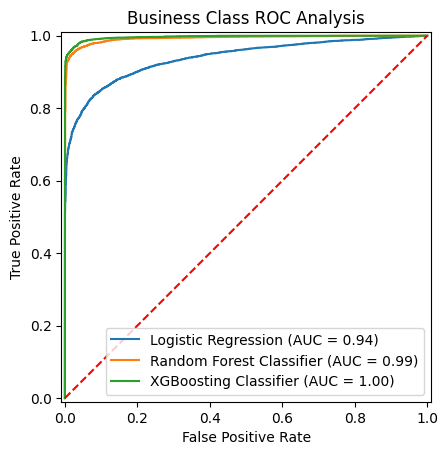

In [23]:
from sklearn.metrics import RocCurveDisplay

# Create a new figure
fig, ax = plt.subplots()

# Compute and plot ROC curve and ROC area for Logistic Regression
RocCurveDisplay.from_estimator(business_tuned_log, X_business_test, y_business_test, ax=ax, name='Logistic Regression')

# Compute and plot ROC curve and ROC area for Gradient Boosting Classifier
RocCurveDisplay.from_estimator(business_tuned_rf, X_business_test, y_business_test, ax=ax, name='Random Forest Classifier')

# Compute and plot ROC curve and ROC area for Neural Network()
RocCurveDisplay.from_estimator(business_tuned_xgb, X_business_test, y_business_test, ax=ax, name='XGBoosting Classifier')

# Add labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Business Class ROC Analysis')

# Add diagonal to depict random classifier
ax.plot([0, 1], [0, 1], "r--")  

plt.show()

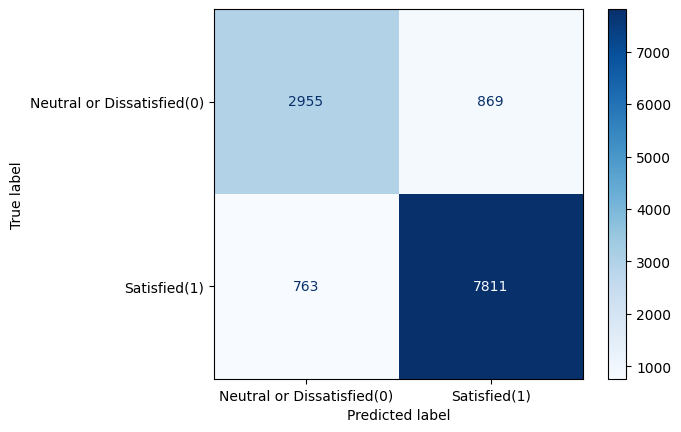

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
# Get the best XGBoost model from the grid search
best_business_model = business_tuned_log.best_estimator_

# Showing the confusion matrix heatmap
ConfusionMatrixDisplay.from_estimator(best_business_model, X_business_test, y_business_test, labels=[0, 1], 
                                      display_labels=['Neutral or Dissatisfied(0)', 'Satisfied(1)'], cmap='Blues',values_format='n')
plt.show()

In [30]:
print('Classification accuracy of XGBoost: {:.4f} %'.format((best_business_model.score(X_business_test, y_business_test)*100)))

Classification accuracy of XGBoost: 86.8366 %


At first glance of the AUC, it was pretty high, so I conducted the Confusion Matrix to examine whether the model has overfitted. Based on the result, we can say that the model actually performs pretty good!

### Model Comparison & Selection: Economy Class

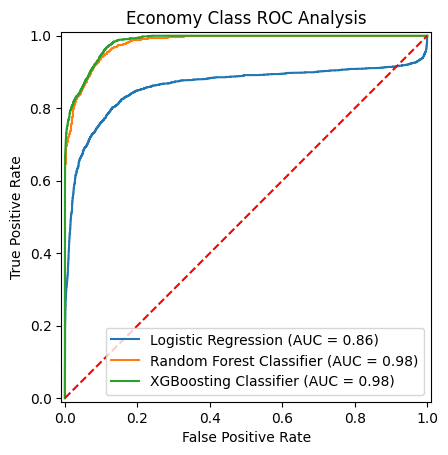

In [24]:
from sklearn.metrics import RocCurveDisplay

# Create a new figure
fig, ax = plt.subplots()

# Compute and plot ROC curve and ROC area for Logistic Regression
RocCurveDisplay.from_estimator(economy_tuned_log, X_economy_test, y_economy_test, ax=ax, name='Logistic Regression')

# Compute and plot ROC curve and ROC area for Gradient Boosting Classifier
RocCurveDisplay.from_estimator(economy_tuned_rf, X_economy_test, y_economy_test, ax=ax, name='Random Forest Classifier')

# Compute and plot ROC curve and ROC area for Neural Network()
RocCurveDisplay.from_estimator(economy_tuned_xgb, X_economy_test, y_economy_test, ax=ax, name='XGBoosting Classifier')

# Add labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Economy Class ROC Analysis')

# Add diagonal to depict random classifier
ax.plot([0, 1], [0, 1], "r--")  

plt.show()

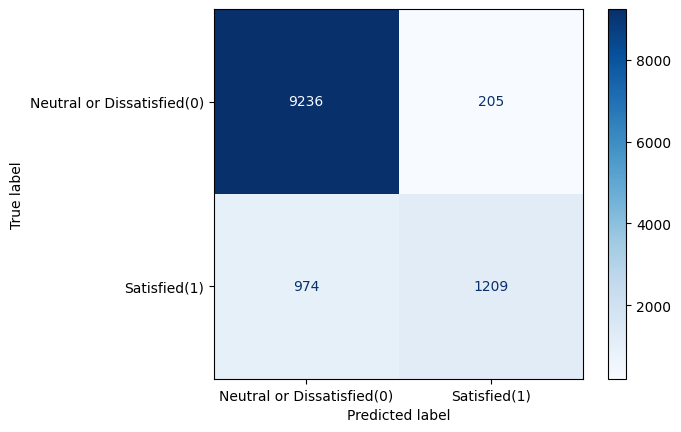

In [32]:
# Get the best XGBoost model from the grid search
best_economy_model = economy_tuned_log.best_estimator_

# Showing the confusion matrix heatmap
ConfusionMatrixDisplay.from_estimator(best_economy_model, X_economy_test, y_economy_test, labels=[0, 1], 
                                      display_labels=['Neutral or Dissatisfied(0)', 'Satisfied(1)'], cmap='Blues',values_format='n')
plt.show()

In [34]:
print('Classification accuracy of XGBoost in Economy Class: {:.4f} %'.format((best_economy_model.score(X_economy_test, y_economy_test)*100)))

Classification accuracy of XGBoost in Economy Class: 89.8572 %


Same as the Business Class, the XGB Classifier predicts pretty well for the economy class!

### Model Comparison & Selection: Economy Plus Class

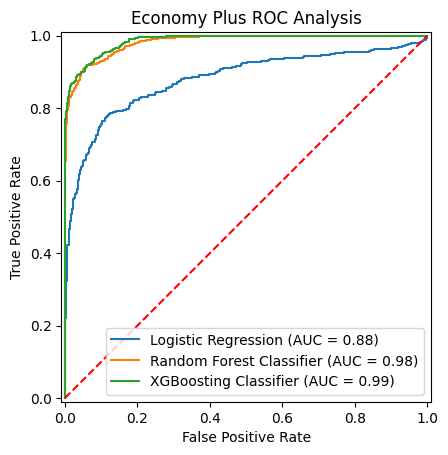

In [25]:
from sklearn.metrics import RocCurveDisplay

# Create a new figure
fig, ax = plt.subplots()

# Compute and plot ROC curve and ROC area for Logistic Regression
RocCurveDisplay.from_estimator(economy_plus_tuned_log, X_economy_plus_test, y_economy_plus_test, ax=ax, name='Logistic Regression')

# Compute and plot ROC curve and ROC area for Gradient Boosting Classifier
RocCurveDisplay.from_estimator(economy_plus_tuned_rf, X_economy_plus_test, y_economy_plus_test, ax=ax, name='Random Forest Classifier')

# Compute and plot ROC curve and ROC area for Neural Network()
RocCurveDisplay.from_estimator(economy_plus_tuned_xgb, X_economy_plus_test, y_economy_plus_test, ax=ax, name='XGBoosting Classifier')

# Add labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Economy Plus ROC Analysis')

# Add diagonal to depict random classifier
ax.plot([0, 1], [0, 1], "r--")  

plt.show()

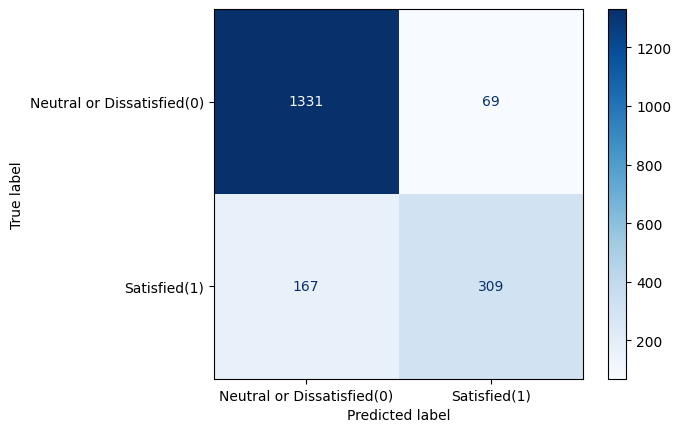

In [35]:
# Get the best XGBoost model from the grid search
best_economy_plus_model = economy_plus_tuned_log.best_estimator_

# Showing the confusion matrix heatmap
ConfusionMatrixDisplay.from_estimator(best_economy_plus_model, X_economy_plus_test, y_economy_plus_test, labels=[0, 1], 
                                      display_labels=['Neutral or Dissatisfied(0)', 'Satisfied(1)'], cmap='Blues',values_format='n')
plt.show()

In [36]:
print('Classification accuracy of XGBoost: {:.4f} %'.format((best_economy_plus_model.score(X_economy_plus_test, y_economy_plus_test)*100)))

Classification accuracy of XGBoost: 87.4200 %


Same as above, for the Economy Plus Class, the XGB Classifier has done a decent job!

### Model Selection
Based on the 3 ROC curve and AUC score, **XGB Classifier** performs the best in all 3 Classes. 

Therefore, I would recommend the airline to use **XGB Classifier** for future use in tracking and predicting passengers' satisfaction.

# 4. Analyzing Feature Importance(Key Areas of Services)

In this section, we are using **Shapley value** to indicate feature importance. 

For each class, we will find **top 3** services that passengers care about the most when it comes to satisfaction based on the **Shapley Value**.

In [26]:
import shap

# Creating explainer for 3 XGBoosting Classifier of different class
explainer_business = shap.Explainer(business_tuned_xgb.best_estimator_)
explainer_economy = shap.Explainer(economy_tuned_xgb.best_estimator_)
explainer_economy_plus = shap.Explainer(economy_plus_tuned_xgb.best_estimator_)

# Calculating SHAP values
shap_values_business = explainer_business(X_business_test)
shap_values_economy = explainer_economy(X_economy_test)
shap_values_economy_plus = explainer_economy_plus(X_economy_plus_test)



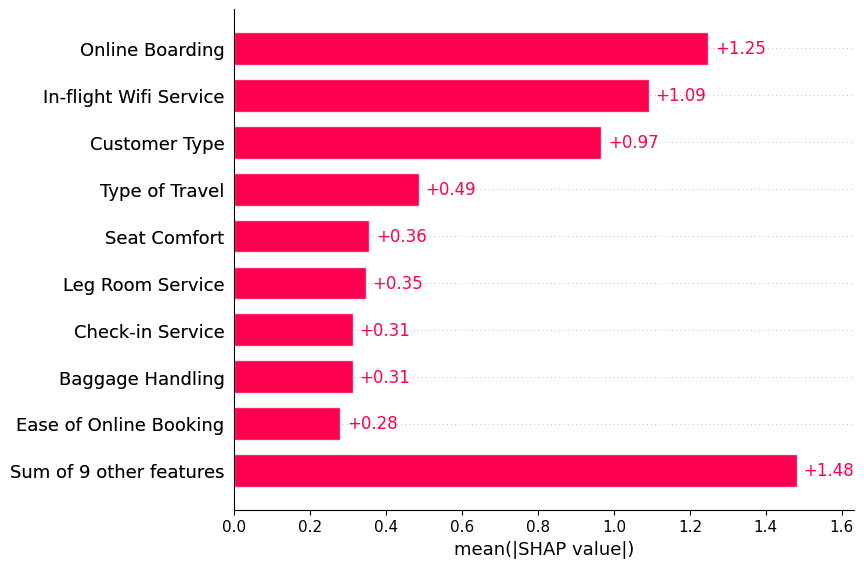

In [27]:
# SHAP-based feature importance analysis simplified
shap.initjs()
shap.plots.bar(shap_values_business)

Based on the graph above, we can see that for **Business Class** Passengers, they care a lot about **Online Boarding**, **In-flight Wifi Service** and **Seat Comfort**. 


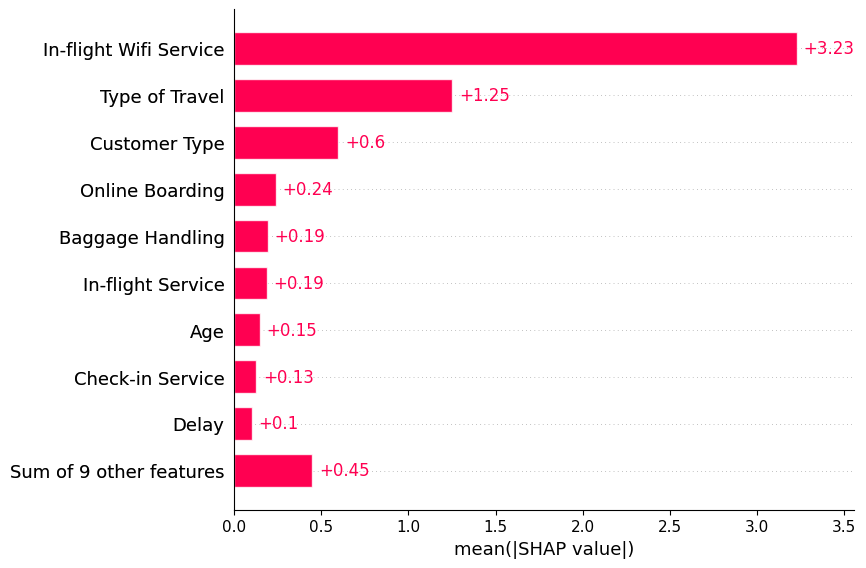

In [28]:
# SHAP-based feature importance analysis simplified
shap.initjs()
shap.plots.bar(shap_values_economy)

For **Economy Class** Passengers, compare to other services, they really care about **In-flight Wifi Service**. 

As for other services, **Online Boarding** and **Baggage Handling** are also important. 

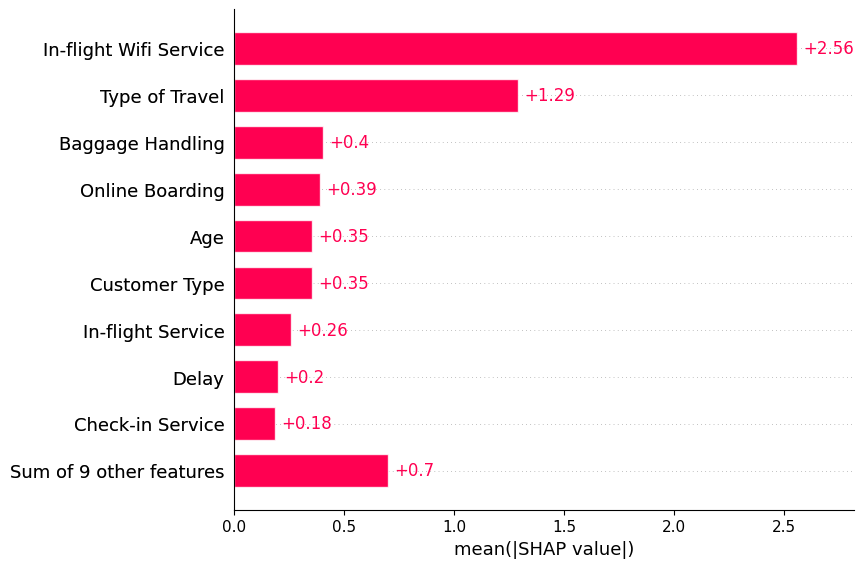

In [29]:
# SHAP-based feature importance analysis simplified
shap.initjs()
shap.plots.bar(shap_values_economy_plus)

Just like passengers from Business and Economy Class, Passengers from the **Economy Plus** Class also care much about **In-flight Wifi Service**.
**Baggage Handling** and **Online Boarding** are also services we should keep an eye out.

## Findings

According to the graphs above, we can found out that if we want to raise the satisfaction among passengers, 

we should emphasize on improving our **In-flight Wifi, Online Boarding and Baggage Handling**, since these services are the emphasis from passengers in at least 2 classes.

For **Business Class** Passengers, we also have to improve our plane seats in order for them to feel more comfortable.

# Summary & Recommendation

During this project, we utilize different supervised learning models to predict airline passengers' satisfaction and analyze key services to improve. 

#### Services Improvement:
Based on the results and **Shapley Value**, the airline should definitely improve their **In-flight Wifi**, **Online Boarding**, **Baggage Handling** and **Seat Comfort**. 

#### Passengers retainment:
Also, with **XGB Classifier**, the airline can precisely predict a passengers satisfaction since the data only suggests part of the airline services.

Based on the prediction, the airline can conduct precision marketing campaign on specific passengers.

For example, for **satisfied passengers**, the airline can encourage them to apply for co-branded credit cards. This way, the airline can retain the passengers.

As for **neutral and dissatisfied passengers**, the airline can send them **coupon** or gave them **sales price** for future flights, by doing this, the airline could probably save some of the passengers. 

# Appendix


## ChatGPT Prompt and Results

1. Asking to put 3 logistic regression model result in 1 table.

**Prompt**:
I have 3 logistic regression result. How can I put them in a table and display? Is there a method like stargazer in R?

**Answer**:
Certainly! Here's an example of how to produce a summary table using statsmodels' summary_col that includes AIC, BIC, and Pseudo R-squared for the models:

In [ ]:
# Combine results into one table
summary_table = summary_col(
    results=[result1, result2, result3],
    model_names=['model1', 'model2', 'model3'],
    stars=True,  # Adds significance stars
    info_dict={
        'AIC': lambda x: f"{x.aic:.2f}",
        'BIC': lambda x: f"{x.bic:.2f}",
        'Pseudo R-squared': lambda x: f"{x.prsquared:.3f}"
    }
)

# Print the combined table
summary_table

**2.Asking for recommendation for Hyperparameter Tuning**

**Prompt**: I have 3 models to assess.LogisticRegression(), RandomForestClassifier(), XGBClassifier(). What param_grid would you recommend?

**Answer**: 

In [ ]:
param_grid_log = {
    'penalty': ['l1', 'l2', 'elasticnet'],     # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],             # Regularization strength (inverse of alpha)
    'solver': ['saga', 'liblinear'],          # Solvers that support 'l1' and 'elasticnet'
    'max_iter': [100, 500, 1000]              # Maximum iterations for convergence
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],         # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                # Whether to use bootstrap samples when building trees
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],           # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],        # Shrinkage rate
    'max_depth': [3, 5, 7],                   # Maximum depth of each tree
    'min_child_weight': [1, 5, 10],           # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 1.0],                  # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],           # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],                   # Minimum loss reduction required to split
    'reg_alpha': [0, 0.1, 1],                 # L1 regularization
    'reg_lambda': [1, 1.5, 2],                # L2 regularization
}


**Final Decision**: 
I only use certain part of the recommendation because of the consideration on calculation speed.